# **By Poorva Kende**

**Prediction using Decision Tree Algorithm**

Dataset:https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df.head(7)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Scatterplotting**

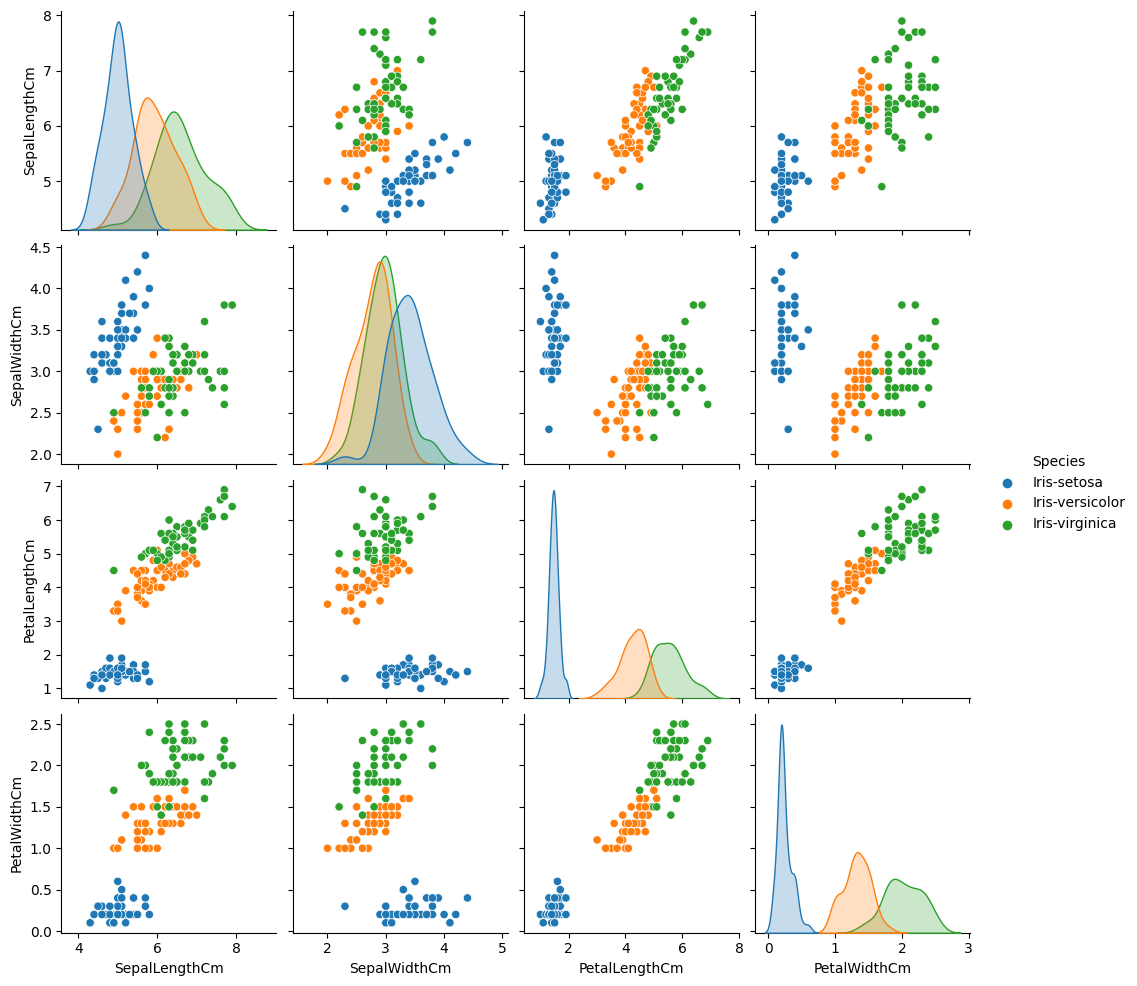

In [9]:
sns.pairplot(df.drop(['Id'],axis=1), hue='Species')
plt.show()

In [10]:
df['Sepal_diff'] = df['SepalLengthCm'] - df['SepalWidthCm']
df['Petal_diff'] = df['PetalLengthCm'] - df['PetalWidthCm']

df['Sepal_Petal_Len_diff'] = df['SepalLengthCm'] - df['PetalLengthCm']
df['Sepal_Petal_Wid_diff'] = df['SepalWidthCm'] - df['PetalWidthCm']

df['Sepal_Petal_Len_Wid_diff'] = df['SepalLengthCm'] - df['PetalWidthCm']
df['Sepal_Petal_Wid_Len_diff'] = df['SepalWidthCm'] - df['PetalLengthCm'] 

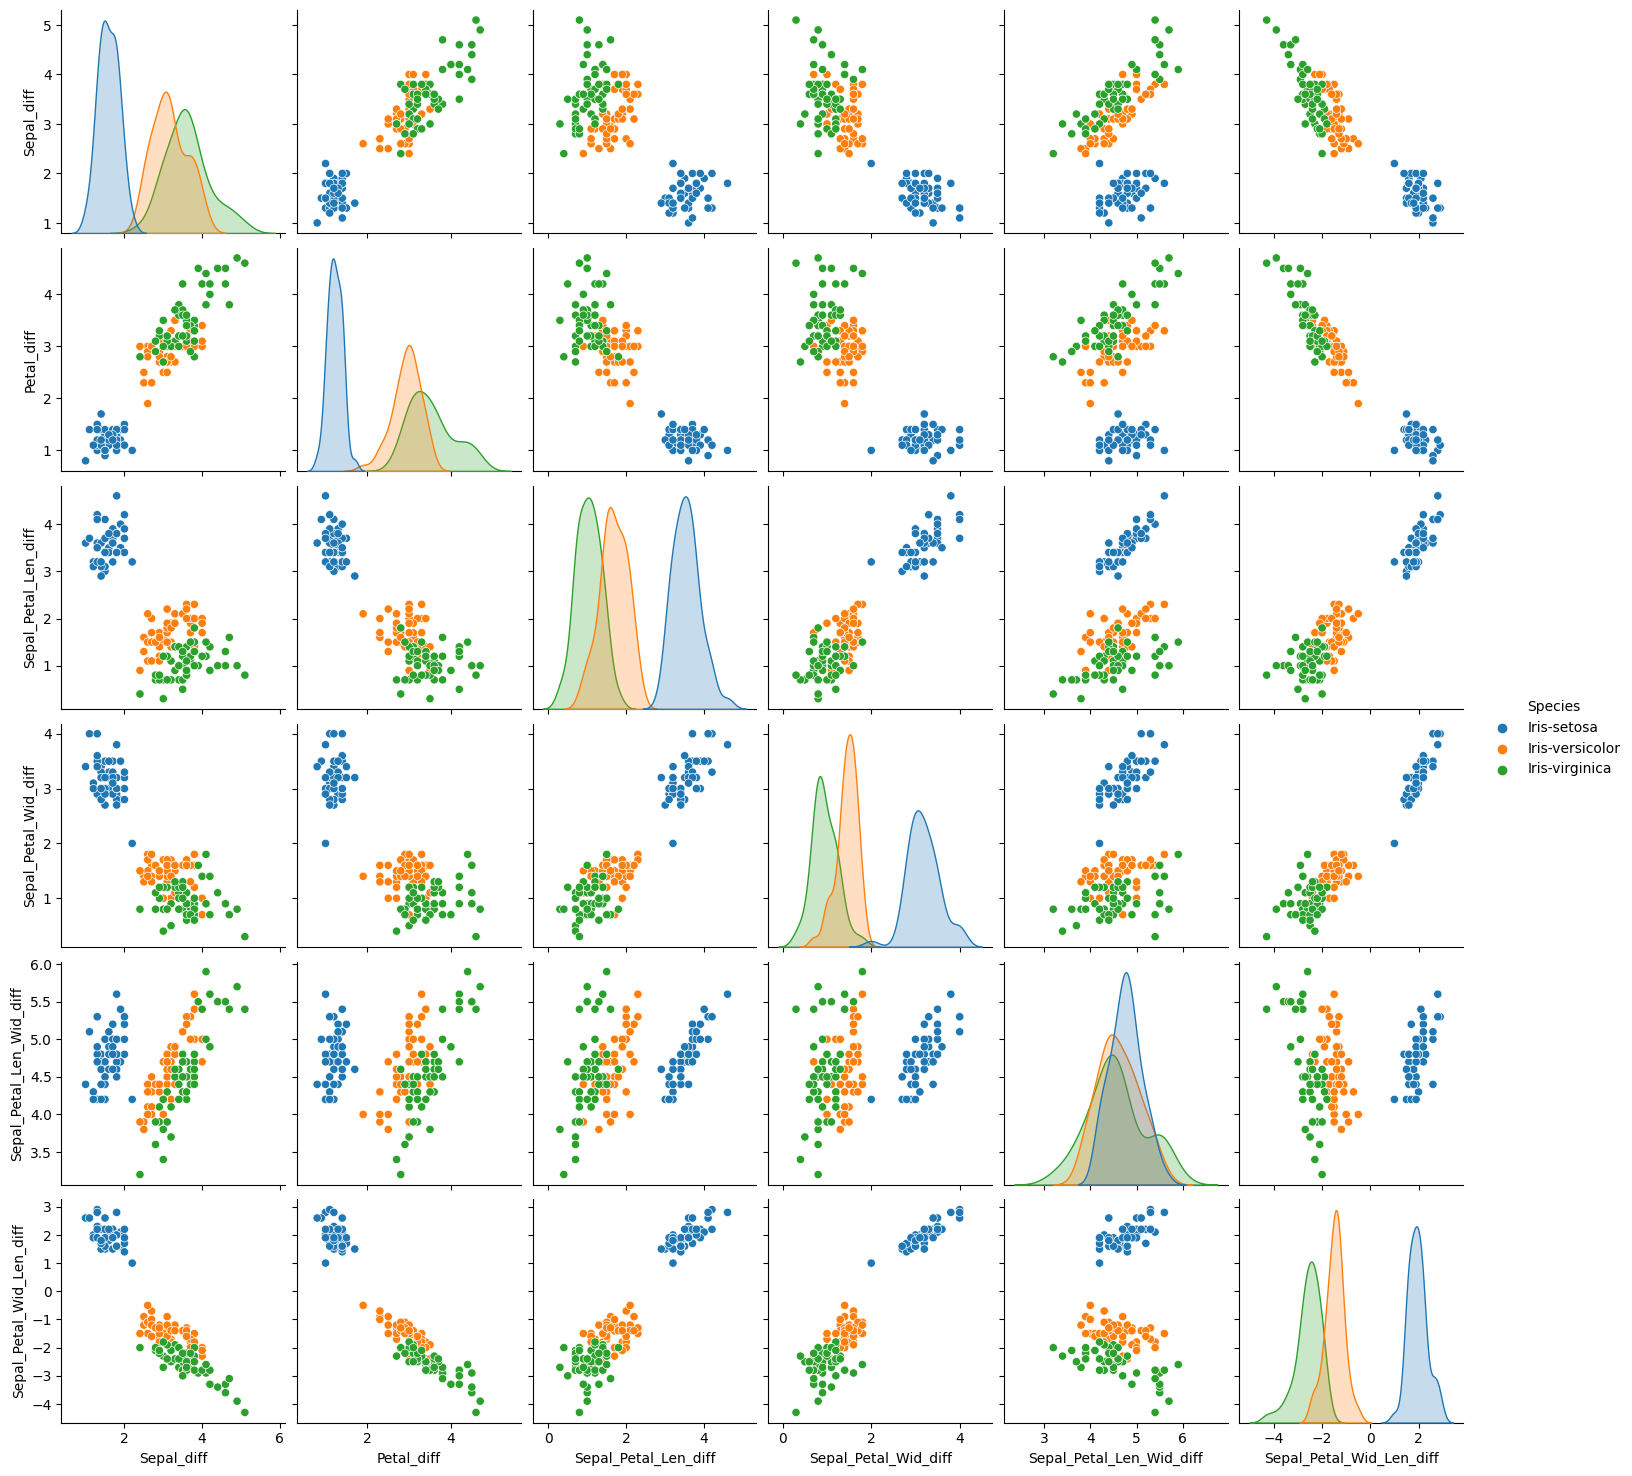

In [11]:
sns.pairplot(df[['Species', 'Sepal_diff', 'Petal_diff', 'Sepal_Petal_Len_diff','Sepal_Petal_Wid_diff', 'Sepal_Petal_Len_Wid_diff', 'Sepal_Petal_Wid_Len_diff']], hue='Species')
plt.show()


In [12]:
df.head(12)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,Petal_diff,Sepal_Petal_Len_diff,Sepal_Petal_Wid_diff,Sepal_Petal_Len_Wid_diff,Sepal_Petal_Wid_Len_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,4.8,2.2
5,6,5.4,3.9,1.7,0.4,Iris-setosa,1.5,1.3,3.7,3.5,5.0,2.2
6,7,4.6,3.4,1.4,0.3,Iris-setosa,1.2,1.1,3.2,3.1,4.3,2.0
7,8,5.0,3.4,1.5,0.2,Iris-setosa,1.6,1.3,3.5,3.2,4.8,1.9
8,9,4.4,2.9,1.4,0.2,Iris-setosa,1.5,1.2,3.0,2.7,4.2,1.5
9,10,4.9,3.1,1.5,0.1,Iris-setosa,1.8,1.4,3.4,3.0,4.8,1.6


# **decision tree classifier**

In [13]:
x = df[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=10)

In [15]:
xt, xv, yt, yv = train_test_split(X_train, Y_train, test_size=0.10, random_state=42)

In [16]:
Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(xt, yt)

DecisionTreeClassifier()

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.665\nsamples = 108\nvalue = [33, 36, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.499\nsamples = 75\nvalue = [0, 36, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.172\nsamples = 42\nvalue = [0, 4, 38]'),
 Text(0.38461538461538464, 0.5, 'x[1] <= 2.65\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[2] <= 5.05\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]

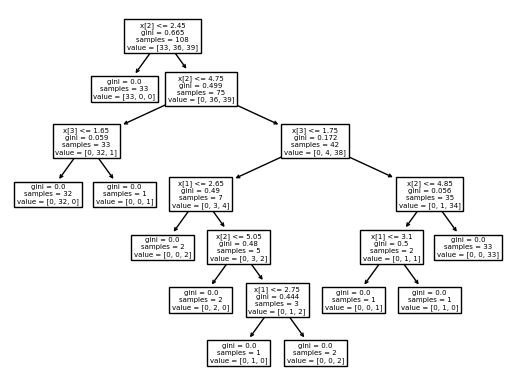

In [17]:
tree.plot_tree(Iris_clf)

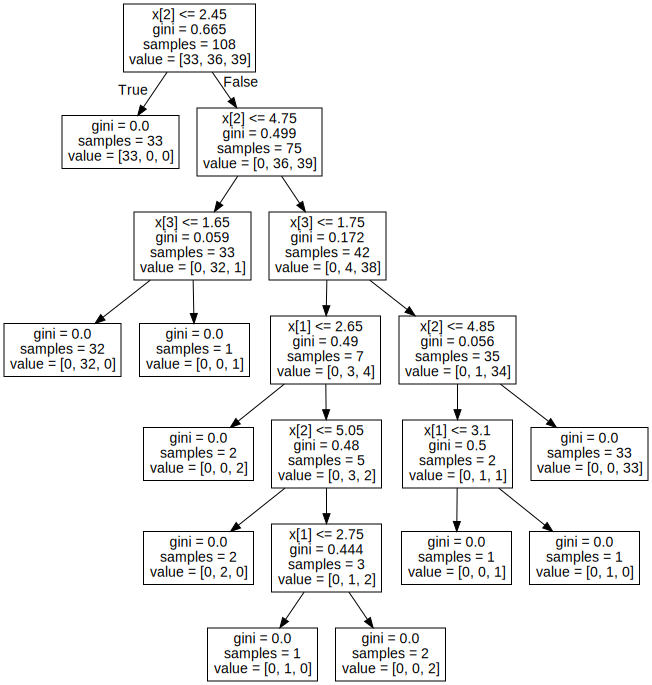

In [18]:
dot_data = tree.export_graphviz(Iris_clf, out_file=None)

graph = graphviz.Source(dot_data)
graph

In [19]:
print('Accuracy score is:',cross_val_score(Iris_clf, xt, yt, cv=3, scoring='accuracy').mean())

Accuracy score is: 0.8703703703703703


In [20]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

Y_hat = Iris_clf.predict(xv)


print('Accuracy score for validation test data is:',accuracy_score(yv, Y_hat))
multilabel_confusion_matrix(yv, Y_hat)

Accuracy score for validation test data is: 1.0


array([[[ 5,  0],
        [ 0,  7]],

       [[11,  0],
        [ 0,  1]],

       [[ 8,  0],
        [ 0,  4]]])

In [21]:
YT_hat = Iris_clf.predict(X_test)
YT_hat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Y_test, YT_hat)*100,'%')
multilabel_confusion_matrix(Y_test , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 96.66666666666667 %


array([[[20,  0],
        [ 0, 10]],

       [[17,  0],
        [ 1, 12]],

       [[22,  1],
        [ 0,  7]]])